<a href="https://colab.research.google.com/github/shubham2637/HandWritten_Alphabet_recognition_using_kerasCNN/blob/master/Paper_39ICR_95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [0]:
!unzip -q "/content/drive/My Drive/handwritten-characters_2.zip"

In [4]:
"""file = "/content/drive/My Drive/handwritten-characters_2.zip"
!pip install rarfile
!pip install patool
from patoolib import extract_archive
import os
extract_to = 'ICR'
os.mkdir(extract_to) 
extract_archive(file, outdir=extract_to)"""

'file = "/content/drive/My Drive/handwritten-characters_2.zip"\n!pip install rarfile\n!pip install patool\nfrom patoolib import extract_archive\nimport os\nextract_to = \'ICR\'\nos.mkdir(extract_to) \nextract_archive(file, outdir=extract_to)'

In [0]:
#import tensorflow as tf

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import os
import tensorflow_datasets as tfds

In [7]:
"""resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)"""

"resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])\ntf.config.experimental_connect_to_cluster(resolver)\ntf.tpu.experimental.initialize_tpu_system(resolver)"

In [0]:
#data_dir = '/content/ICR/ddd'

In [0]:
#os.listdir(data_dir)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [0]:

test_path = "/content/Validation/"
train_path = "/content/Train/"

In [12]:
os.listdir(test_path)

['Z',
 'S',
 '3',
 '0',
 'L',
 'F',
 '4',
 'N',
 'Q',
 'R',
 '9',
 'A',
 'J',
 '&',
 'M',
 'U',
 'G',
 '@',
 'X',
 'Y',
 'T',
 'K',
 'C',
 'H',
 'W',
 'B',
 'D',
 '5',
 '2',
 'E',
 'P',
 '#',
 '7',
 '6',
 'V',
 '8',
 'I',
 '$',
 '1']

In [0]:
num_classes = len(os.listdir(train_path))

In [14]:
os.listdir(test_path+'Q')[-1]

'126.jpg'

In [0]:
image_1_file_location =test_path+'Q/'+ os.listdir(test_path+'Q')[10]

In [16]:
image_1_file_location

'/content/Validation/Q/_1_46.jpg'

In [17]:
imread(image_1_file_location).shape

(32, 32)

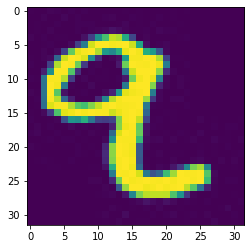

In [18]:
plt.imshow(imread(image_1_file_location))

In [0]:
image_shape = (28,28,1)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
#image_gen.flow_from_directory(train_path)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,AveragePooling2D

In [24]:
model = Sequential()
# Step 1 - Convolution layer 1
model.add(Conv2D(64, (5,5), padding='same', input_shape = image_shape, activation = 'relu'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5)) # antes era 0.25
# Adding a second convolutional layer
model.add(Conv2D(128, (2,2), padding='same', activation = 'relu'))
model.add(Conv2D(128, (2,2), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5)) # antes era 0.25
# Adding a third convolutional layer
model.add(Conv2D(256, (2,2), padding='same', activation = 'relu'))
model.add(Conv2D(256, (2,2), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5)) # antes era 0.25
# Step 3 - Flattening
model.add(Flatten())
# Step 4 - Full connection
model.add(Dense(units = 512, activation = 'relu'))
#model.add(Dropout(0.5)) 
model.add(Dense(units = num_classes, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [0]:
batch_size = 1024

In [28]:
train_image_gen = train_datagen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 834036 images belonging to 39 classes.


In [29]:
test_image_gen = test_datagen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 22524 images belonging to 39 classes.


In [30]:
train_image_gen.class_indices

{'#': 0,
 '$': 1,
 '&': 2,
 '0': 3,
 '1': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '6': 9,
 '7': 10,
 '8': 11,
 '9': 12,
 '@': 13,
 'A': 14,
 'B': 15,
 'C': 16,
 'D': 17,
 'E': 18,
 'F': 19,
 'G': 20,
 'H': 21,
 'I': 22,
 'J': 23,
 'K': 24,
 'L': 25,
 'M': 26,
 'N': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38}

#Uncomment tO train model

In [31]:
results = model.fit(train_image_gen,
                              epochs=1024,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/1024
815/815 [==============================] - 716s 879ms/step - loss: 0.3960 - acc: 0.8797 - val_loss: 0.2082 - val_acc: 0.9389
Epoch 2/1024
815/815 [==============================] - 376s 461ms/step - loss: 0.1738 - acc: 0.9407 - val_loss: 0.1857 - val_acc: 0.9394
Epoch 3/1024
815/815 [==============================] - 203s 249ms/step - loss: 0.1532 - acc: 0.9467 - val_loss: 0.1582 - val_acc: 0.9516
Epoch 4/1024
815/815 [==============================] - 185s 227ms/step - loss: 0.1424 - acc: 0.9498 - val_loss: 0.1643 - val_acc: 0.9493
Epoch 5/1024
815/815 [==============================] - 186s 228ms/step - loss: 0.1343 - acc: 0.9522 - val_loss: 0.1508 - val_acc: 0.9541
Epoch 6/1024
815/815 [==============================] - 190s 233ms/step - loss: 0.1281 - acc: 0.9538 - val_loss: 0.1470 - val_acc: 0.9534
Epoch 7/1024
815/815 [==============================] - 189s 232ms/step - loss: 0.1227 - acc: 0.9553 - val_loss: 0.1645 - val_acc: 0.9477
Epoch 8/1024
815/815 [============

In [32]:
"""import tensorflow as tf
tf.keras.models.save_model('ICR_39')"""

TypeError: ignored

#loading the model

In [0]:
#model = tf.keras.models.load_model('/content/drive/My Drive/trained_models/ICR/final_ICR _91_69')

In [0]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model Evaluations


In [0]:
test_image_gen.reset()

In [34]:
model.evaluate_generator(test_image_gen)

[0.1469710712391878, 0.95342743]

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       32896     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       65664     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 128)         0

In [0]:
#test_image_gen=  train_image_gen

In [37]:
model.metrics_names

['loss', 'acc']

In [38]:
scores = model.evaluate(test_image_gen, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("CNN Acuracy: %.2f%%" % (scores[1]*100))

22/22 [==============================] - 4s 191ms/step - loss: 0.1470 - acc: 0.9534
CNN Error: 4.66%
CNN Acuracy: 95.34%


In [0]:
#pred = model.predict_generator(test_image_gen)

In [40]:
pred= model.predict_generator(test_image_gen)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_image_gen.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[ 0  0  0 ... 38 38 38]
{'#': 0, '$': 1, '&': 2, '0': 3, '1': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, '@': 13, 'A': 14, 'B': 15, 'C': 16, 'D': 17, 'E': 18, 'F': 19, 'G': 20, 'H': 21, 'I': 22, 'J': 23, 'K': 24, 'L': 25, 'M': 26, 'N': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38}
['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(predicted_class_indices, test_image_gen.classes))

[[1300    0    0 ...    0    0    0]
 [   0 1350    0 ...    0    0    0]
 [   0    0  520 ...    0    0    0]
 ...
 [   0    0    0 ...  114    0    0]
 [   0    0    0 ...    1  159    1]
 [   0    0    0 ...    1    0  157]]


In [42]:
print(classification_report(test_image_gen.classes,predicted_class_indices))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      1.00      1350
           2       1.00      1.00      1.00       520
           3       0.90      0.99      0.94       368
           4       0.92      0.90      0.91      1675
           5       0.98      0.97      0.98      1267
           6       1.00      1.00      1.00      1301
           7       0.99      0.99      0.99      1277
           8       1.00      0.96      0.98      1388
           9       0.97      0.99      0.98      1594
          10       0.97      0.99      0.98       190
          11       0.99      0.99      0.99      1198
          12       0.89      0.99      0.94      1195
          13       1.00      1.00      1.00      1250
          14       0.92      0.97      0.94       392
          15       0.96      0.88      0.92       385
          16       0.93      0.88      0.91       168
          17       0.97    

In [43]:
test_image_gen.classes.shape

(22524,)

In [0]:
#print(classification_report(test_image_gen.classes,predictions))

#Saving the model


In [45]:
model.save('final_ICR_39')
model.save('/content/drive/My Drive/trained_models/ICR/final_ICR_39')

OSError: ignored

Single prediction

In [0]:
from tensorflow.keras.preprocessing import image

In [47]:
my_image = image.load_img(image_1_file_location,target_size=image_shape,grayscale=True)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [48]:
my_image

In [49]:
my_image_arr = image.img_to_array(my_image)
my_image_arr.shape

(28, 28, 1)

In [50]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)
my_image_arr.shape

(1, 28, 28, 1)

## Input size of image (1, 28, 28, 1)

In [0]:
 p = model.predict_classes(my_image_arr)

In [0]:
#train_image_gen.class_indices

In [53]:
labels2[p[0]]

'Q'

In [54]:
print(f"Predicted Label is {labels2[p[0]]}")

Predicted Label is Q


#graphs

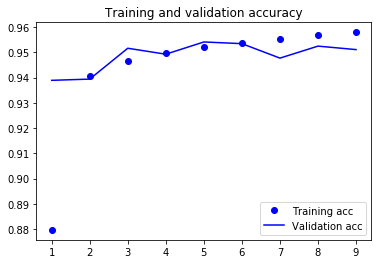

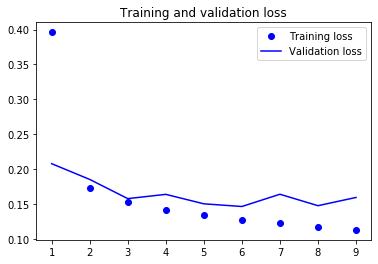

In [56]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
metrics = pd.DataFrame(model.history.history)
metrics

In [0]:
metrics[['loss','val_loss']].plot()

In [0]:
metrics[['accuracy','val_accuracy']].plot()

In [0]:
!unrar x "/content/drive/My Drive/ICRdata.rar"

In [0]:
p = model.predict_classes(my_image_arr)